In [72]:
!pip install wordcloud
!pip install nltk

You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/python/envs/default/bin/python -m pip install --upgrade pip' command.


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches
from wordcloud import WordCloud

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/datalore/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
df = pd.read_csv("./Assgn1-Data-111903152_111903153_111903158.csv")

In [75]:
df = df.drop("Unnamed: 8", axis=1)
df['Result'] = df['Label']
for i in range(0,len(df)):
    if (df['Result'][i] == 'false'):
        df['Result'][i] = 0
    elif (df['Result'][i] == 'pants-fire'):
        df['Result'][i] = 0
    elif (df['Result'][i] == 'full-flop'):
        df['Result'][i] = 0
    elif (df['Result'][i] == 'half-flip'):
        df['Result'][i] = 0
    elif (df['Result'][i] == 'true'):
        df['Result'][i] = 1
    elif (df['Result'][i] == 'half-true'):
        df['Result'][i] = 1
    else:
        df['Result'][i] = 1
df.head()

<ipython-input-75-5dd12662bffc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Result'][i] = 0
<ipython-input-75-5dd12662bffc>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Result'][i] = 1
<ipython-input-75-5dd12662bffc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Result'][i] = 1
<ipython-input-75-5dd12662bffc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the

,ID,Statement,Link,Date,Source,Checker_Stmt,Text,Label,Result
0,0,Quotes show Joseph Stalin and Joe Biden expres...,https://www.politifact.com/factchecks/2022/jan...,"January 24, 2022",Viral image,"<h2 class=""c-title c-title--subline"">\nNo, Bid...","Though divided by countries, decades and ideol...",false,0
1,1,“The CDC admits that natural immunity from pri...,https://www.politifact.com/factchecks/2022/jan...,"January 19, 2022",Bloggers,"<h2 class=""c-title c-title--subline"">\nBlog po...","A blog post claims that according to a study, ...",barely-true,1
2,2,"In Iowa, “since we have put a number of the vo...",https://www.politifact.com/factchecks/2022/jan...,"January 23, 2022",Joni Ernst,"<h2 class=""c-title c-title--subline"">\nNumbers...","U.S. Sen. Joni Ernst, R-Iowa, spent time this ...",true,1
3,3,“There’s 150 I believe now – it’s over 100 pro...,https://www.politifact.com/factchecks/2022/jan...,"January 23, 2022",John Stockton,"<h2 class=""c-title c-title--subline"">\nJohn St...",NBA All-Star John Stockton made headlines afte...,false,0
4,4,“It begins. Wisconsin Assembly votes to remove...,https://www.politifact.com/factchecks/2022/jan...,"January 26, 2022",Facebook posts,"<h2 class=""c-title c-title--subline"">\nWiscons...",The 2020 presidential election results have be...,false,0


In [76]:
include=[int, float, object]
df.describe(include=include)

,ID,Statement,Link,Date,Source,Checker_Stmt,Text,Label,Result
count,3000.000000,3000,3000,3000,3000,3000,3000,3000,3000.0
unique,NaN,2992,2995,638,550,2993,2995,18,2.0
top,NaN,Ivermectin caused a substantial decrease in th...,https://www.politifact.com/factchecks/2021/mar...,"November 4, 2020",Facebook posts,Bloggers,A Democratic-led plan to cut carbon emissions ...,false,0.0
freq,NaN,2,2,29,933,3,2,1474,2012.0
mean,299.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,173.233715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,149.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,299.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,449.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
df.isnull().sum()

In [78]:
df = df.fillna('')

In [79]:
df.isnull().sum()

In [80]:
def RemoveHTMLTags(strr):
    a = re.compile(r'<[^>]+>').sub('', str(strr))
    a = a[1:]
    return a


def RemoveTextInTags(strr):
    if len(strr) > 10:
        return "pants-fire"
    else:
        return strr


def RemoveURL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)


def RemovePunctuation(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)


def is_date(string):
    try:
        date = pd.to_datetime(string)
        return True
    except ValueError:
        return False


df["Checker_Stmt"] = df["Checker_Stmt"].map(RemoveHTMLTags)
df["Label"] = df["Label"].map(RemoveTextInTags)
df["Text"] = df["Text"].map(RemoveURL)
df["Text"] = df["Text"].map(RemovePunctuation)
df['Text'] = df['Text'].apply(lambda x: x.lower())
df = df[df['Date'].apply(is_date)]
df['Date'] = pd.to_datetime(df['Date'])
df['Text'] = df['Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

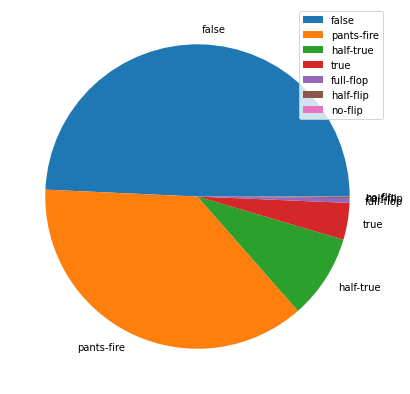

In [81]:
y = df["Label"].value_counts().reset_index()
labels = y["index"]
y = np.array(y["Label"])

f = plt.figure()
f.set_figwidth(7)
f.set_figheight(7)
plt.pie(y, labels=labels)
plt.legend()
plt.show()

In [82]:
df['Label'] = df['Label'].replace(['no-flip', 'full-flop', 'half-flip', 'pants-fire'], 'false')
df['Label'] = df['Label'].replace(['half-true'], 'true')

2020-04-02 00:00:00


<ipython-input-83-c95dc8432732>:17: MatplotlibDeprecationWarning: 
The epoch2num function was deprecated in Matplotlib 3.5 and will be removed two minor releases later. Use mdates.date2num(datetime.utcfromtimestamp(e)) instead.
  bins = mdates.epoch2num(bins)


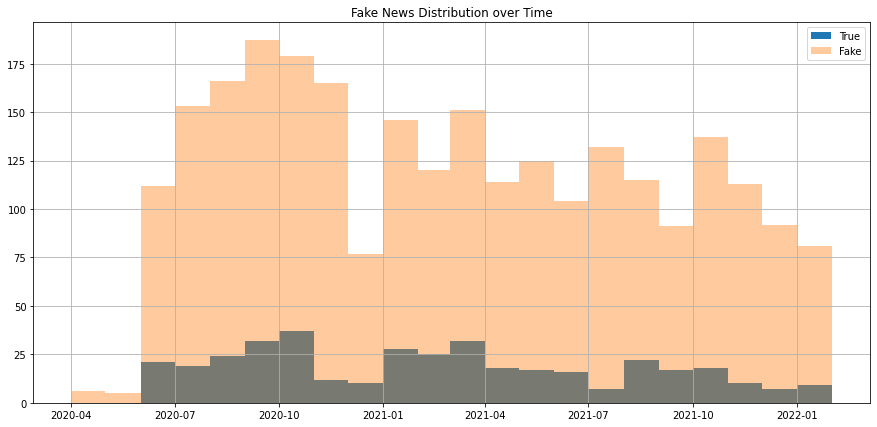

In [83]:
import matplotlib.dates as mdates
import random
import datetime as d

df = df[df['Date'] > '2020-01-01']
minDate = min(df['Date'])
print(minDate)
maxDate = df['Date'][0]
binDate = d.datetime(year=minDate.year, month=minDate.month, day=1)
bins = [binDate.timestamp()]
while binDate < maxDate:
    if binDate.month == 12:
        binDate = d.datetime(year=binDate.year + 1, month=1, day=1)
    else:
        binDate = d.datetime(year=binDate.year, month=binDate.month + 1, day=1)
    bins.append(binDate.timestamp())
bins = mdates.epoch2num(bins)

df['Date'] = df['Date'].astype("datetime64")
plt.figure(figsize = (15,7))
df[df['Label'] == "true"]['Date'].hist(label='True', bins=bins)
df[df['Label'] == "false"]['Date'].hist(alpha=0.4, label='Fake', bins=bins)
plt.title('Fake News Distribution over Time')
plt.legend()
plt.show()

In [84]:
label_encoder = preprocessing.LabelEncoder()

df["Label"].unique()
df['Encoded']= label_encoder.fit_transform(df['Label'])
df["Label"].unique()
label_encoder.inverse_transform(df["Encoded"].unique())

In [85]:
def create_corpus_df(news, target):
    corpus=[]
    
    for x in news[news['Encoded']==target]['Text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

false_corpus=create_corpus_df(df,0)
true_corpus=create_corpus_df(df,1)

In [86]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(df["Text"])
new_df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names_out(), columns=["TF-IDF"])
new_df = new_df.sort_values('TF-IDF', ascending=False)
print(new_df.head(25))

              TF-IDF
stalin      0.661500
vote        0.248712
count       0.225618
gets        0.192492
election    0.143020
subversion  0.139263
votes       0.114842
it          0.110701
apocryphal  0.109814
bazhanov    0.109814
said        0.098722
attributed  0.090776
history     0.087624
soviet      0.087252
biden       0.084276
struggle    0.082293
archive     0.075368
что         0.073209
будет       0.073209
как         0.073209
кто         0.073209
counts      0.072892
easier      0.065479
kramer      0.065125
weiser      0.065125


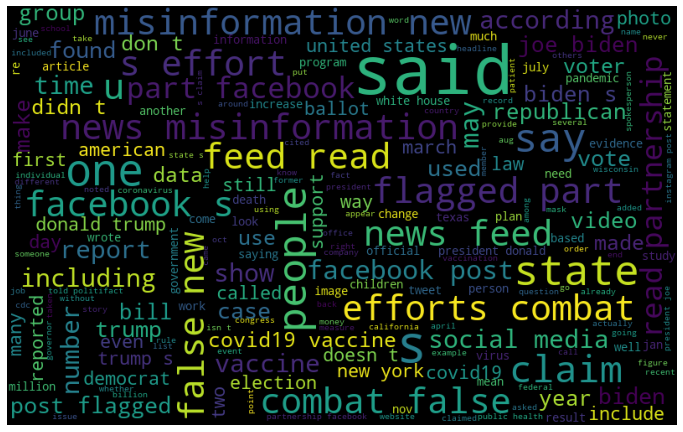

In [87]:
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          width= 800, height= 500,
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(false_corpus))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

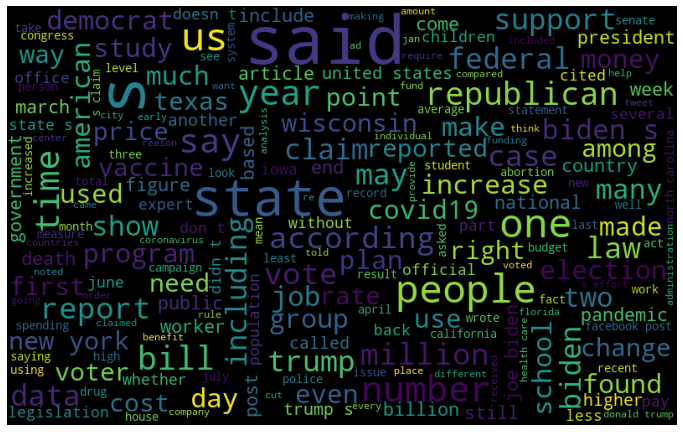

In [88]:
plt.figure(figsize=(12,8))
word_cloud = WordCloud(
                          width= 800, height= 500,
                          background_color='black',
                          max_font_size = 80
                         ).generate(" ".join(true_corpus))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [89]:
from nltk import tokenize
import seaborn as sns

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

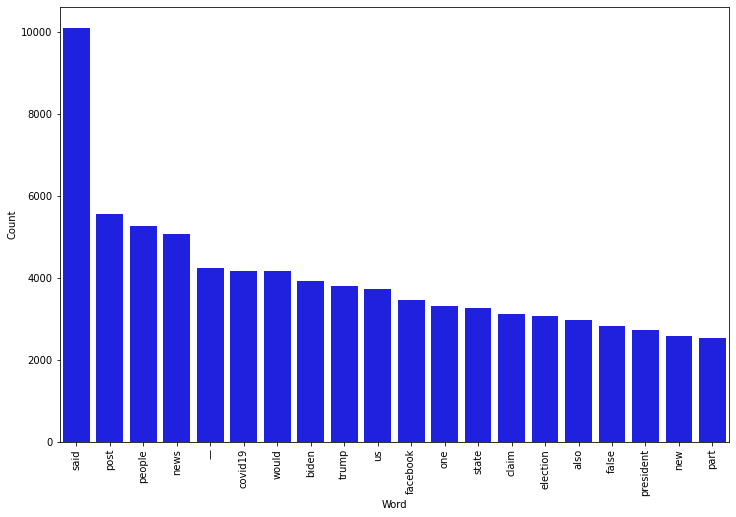

In [90]:
counter(df[df["Label"] == "false"], "Text", 20)

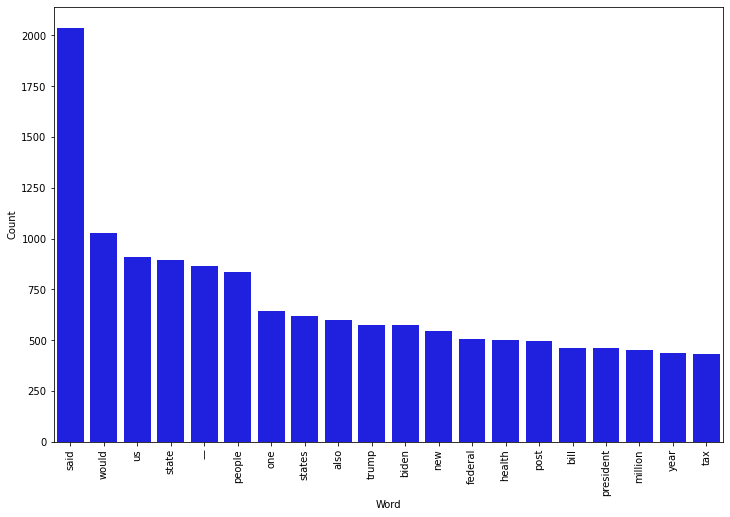

In [91]:
counter(df[df["Label"] == "true"], "Text", 20)

In [92]:
from sklearn import metrics
import itertools

dct = dict()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [93]:
X_train,X_test,y_train,y_test = train_test_split(df['Text'], df['Label'], test_size=0.2, random_state=42)

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import accuracy_score

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 85.45%


Confusion matrix, without normalization


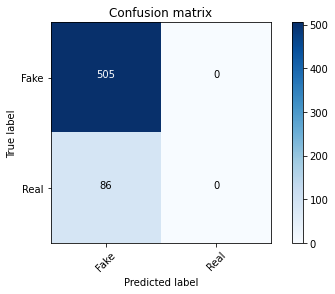

In [95]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [96]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20, 
                                           splitter='best', 
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 82.23%


Confusion matrix, without normalization


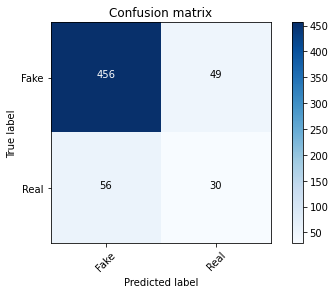

In [97]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

In [98]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 85.45%


Confusion matrix, without normalization


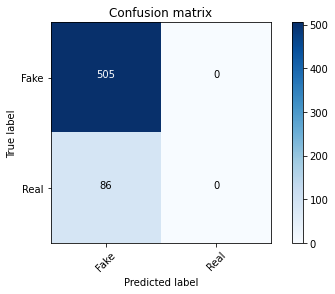

In [99]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

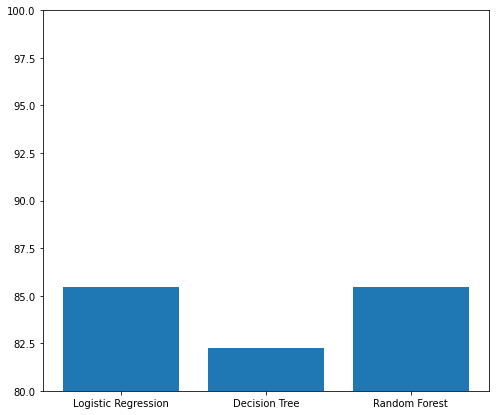

In [100]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(80,100)

In [101]:
df2 = df.groupby(["Source","Result"]).size().reset_index(name='Count')
df2

,Source,Result,Count
0,10 GOP Louisiana Lawmakers,0,1
1,60 Plus Association,0,1
2,AFSCME,1,2
3,Aaron Rodgers,0,2
4,Abby Finkenauer,1,1
...,...,...,...
626,Xavier Becerra,0,1
627,Xavier Becerra,1,1
628,YouTube videos,0,15
629,YouTube videos,1,2


In [102]:
row=[]
fake_not=[]
source=[]
percent=[]
k=0
keyList = ["Source","Percent_fake","Fake Source or True Source"]
flag=0
d = {}
     
for i in (df2.index):
  if(df2['Source'][i] not in row):
    total=df2['Count'][i]
    fake=0
    for j in (df2.index):
      if(df2['Source'][i] == df2['Source'][j] and i!=j):
        total= total + df2['Count'][j]
        flag=j
    if(df2['Result'][flag] == 0 and flag!=0):
          fake=df2['Count'][flag]
    elif(df2['Result'][i] == 0):
          fake=df2['Count'][i]
    percent_fake=(fake/total)*100.00
    if(percent_fake >=60):
        fake_not.append("Fake")
    else:
        fake_not.append("Not Fake")
    source.append(df2['Source'][i])
    percent.append(percent_fake)
    row.append(df2['Source'][i])
    k=k+1
  else:
    continue

d.update( [('Source', source),('Percent_fake',percent),('Fake Source or True Source',fake_not)] )
   
df3 = pd.DataFrame(d)
  
df3

,Source,Percent_fake,Fake Source or True Source
0,10 GOP Louisiana Lawmakers,100.000000,Fake
1,60 Plus Association,100.000000,Fake
2,AFSCME,0.000000,Not Fake
3,Aaron Rodgers,100.000000,Fake
4,Abby Finkenauer,0.000000,Not Fake
...,...,...,...
530,Wisconsin state Senate Democrats,0.000000,Not Fake
531,WorldNetDaily,100.000000,Fake
532,Xavier Becerra,50.000000,Not Fake
533,YouTube videos,88.235294,Fake


Not Fake    329
Fake        206
Name: Fake Source or True Source, dtype: int64


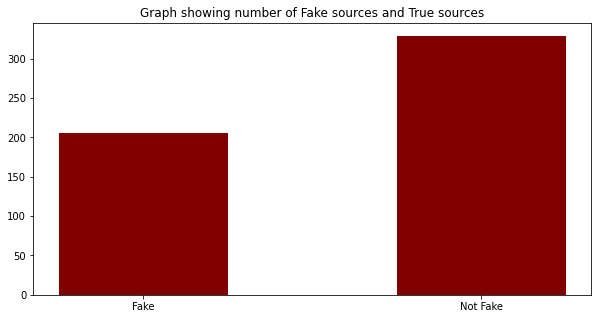

In [103]:
count = df3["Fake Source or True Source"].value_counts()
print (count)
data = {'Fake':count["Fake"], 'Not Fake': count["Not Fake"]}
Fake = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 5))
 
plt.bar(Fake, values, color ='maroon',
        width = 0.5)

plt.title("Graph showing number of Fake sources and True sources")
plt.show()